# Exercise A-5: Incomplete data

In applications such as machine learning, the task often involves filling in incomplete (missing) entries in a data matrix in such a way that certain desired properties are obtained. 

Here, we consider a simpler problem: 

Let a vector 

$$
[
\mathbf{x} = (x_1, x_2, \ldots, x_n)^T \in \mathbb{R}^n
]
$$

be given. The components $(x_1)$ and $(x_n)$ are numerically provided, but some $(m)$ of the remaining coefficients $(x_2, \ldots, x_{n-1})$ are unknown (where $(1 \leq m \leq n - 2)$).

We now aim to determine these remaining coefficients so that the vector $(\mathbf{x})$ appears as "smooth" as possible, i.e., the expression 

$$
[
\sum_{j=2}^{n-1} \left(x_{j-1} - 2x_j + x_{j+1}\right)^2
]
$$

should be as small as possible. (The terms $(x_{j-1} - 2x_j + x_{j+1})$ correspond to a discrete approximation to the second derivative.)

If $(m)$ coefficients $(x_j)$ are unknown, then this expression is a function of the corresponding $(m)$ variables.

The necessary condition for minimizing this expression is that the partial derivatives with respect to all these variables must be zero.

### Sub-Tasks:

1. **Show:** This condition leads to a linear system of equations for the corresponding variables ($(m)$ equations with $(m)$ unknowns).

(It can be shown that the solution of this system of equations indeed yields the minimum.)

What form does this system of equations have?

2. **Assume** $(m = n - 2)$ (all internal coefficients are unknown).

Find out (without computing) what the solution looks like in this case.

3. **Implement** the solution to this system of equations, for simplicity assuming $(n)$ is odd and the unknown coefficients are $(x_2, x_4, \ldots, x_{n-1})$ (the other coefficients are known and numerically provided).

4. **Document** your approach, including some specific test cases with visualization of the solution profile.


In [23]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix, init_printing, symbols, latex, det, Function, Sum, diff, Eq, simplify, solve
from sympy.abc import A
from IPython.display import display, Math

In [24]:
# Pre-requisites for pretty printing
init_printing()

In [25]:
# Function to format matrices dynamically for LaTeX
def format_matrix(name, matrix):
    return f"{name} = " + latex(matrix)
# Function to format determinants dynamically for LaTeX
def format_determinant(name, determinant):
    return f"\\det({name}) = " + latex(determinant)
# Function to format vectors dynamically for LaTeX
def format_vector(name, vector):
    return f"{name} = " + latex(vector)

# Solution for 1)

**Show:** This condition leads to a linear system of equations for the corresponding variables ($(m)$ equations with $(m)$ unknowns).

(It can be shown that the solution of this system of equations indeed yields the minimum.)

What form does this system of equations have?

In [26]:
# Define the variables and function
n = symbols('n', integer=True, positive=True)
x = Function('x')  # Symbolic function x(j)
j = symbols('j', integer=True)

# Define the smoothness criterion
smoothness_expr = Sum((x(j - 1) - 2 * x(j) + x(j + 1))**2, (j, 2, n - 1))
display(Math(f"S(x) = {latex(smoothness_expr)}"))

# Partial derivative with respect to x(j)
partial_deriv = diff(smoothness_expr, x(j))
display(Math(f"\\frac{{\\partial S}}{{\\partial x_j}} = {latex(simplify(partial_deriv))}"))

# The necessary condition for minimization:
condition = Eq(simplify(partial_deriv), 0)
display(Math(f"\\text{{Condition for minimization: }} {latex(condition)}"))

# General tridiagonal equation
tridiagonal_eq = Eq(x(j - 1) - 2 * x(j) + x(j + 1), 0)
display(Math(f"\\text{{Tridiagonal equation: }} {latex(tridiagonal_eq)}"))

# Matrix formulation (symbolic example)
A_example = Matrix([
    [-2, 1, 0],
    [1, -2, 1],
    [0, 1, -2]
])
b_example = Matrix([-x(1), 0, -x(n)])  # Assuming boundary conditions are x(1) and x(n)
display(Math(format_matrix("A", A_example)))
display(Math(format_vector("b", b_example)))
display(Math(f"\\text{{Linear system: }} A \\mathbf{{x}} = \\mathbf{{b}}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Solution for 2)

**Assume** $(m = n - 2)$ (all internal coefficients are unknown).

Find out (without computing) what the solution looks like in this case.

In [31]:
# Define coefficients a, b, and c for a general quadratic solution
a, b, c = symbols('a b c')

# Define the general quadratic solution
j = symbols('j', integer=True)
general_solution = a * j**2 + b * j + c
display(Math(f"x_j = {latex(general_solution)}"))

# Boundary conditions
x1, xn = symbols('x_1 x_n')  # Boundary values
bc1 = Eq(general_solution.subs(j, 1), x1)  # At j = 1, x_1 is given
bc2 = Eq(general_solution.subs(j, n), xn)  # At j = n, x_n is given
display(Math(f"\\text{{Boundary conditions: }} {latex(bc1)}, {latex(bc2)}"))

# Intermediate point condition
# For smoothness, the quadratic should interpolate smoothly at any j.
smooth_condition = Eq(general_solution.diff(j, 2), 0)
display(Math(f"\\text{{Smoothness condition: }} {latex(smooth_condition)}"))

# Solve for coefficients a, b, and c
coefficients = solve([bc1, bc2, smooth_condition], [a, b, c])
display(Math(f"\\text{{Solved coefficients: }} a = {latex(coefficients[a])}, b = {latex(coefficients[b])}, c = {latex(coefficients[c])}"))

# Construct the full quadratic solution
quadratic_solution = general_solution.subs(coefficients)
display(Math(f"\\text{{Final quadratic solution: }} x_j = {latex(quadratic_solution)}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

1. We assumed that the smooth solution is a quadratic function of the form:
   $$x_j = aj^2 + bj + c.$$
2. Applied the boundary conditions $(x_1)$ and $(x_n)$ to solve for $(a, b, c)$:
   - $(x(1) = x_1)$
   - $(x(n) = x_n)$.
3. Enforced the smoothness condition by setting the second derivative of the quadratic function to zero:
   $$\frac{d^2x_j}{dj^2} = 0.$$
4. Solved the resulting system of equations to find the coefficients $(a, b, c)$.
5. Substituted these coefficients back into the quadratic form to construct the final solution:
   $$x_j = \frac{x_n - x_1}{n - 1}(j - 1) + x_1.$$

This represents a **linearly interpolated smooth solution** between $(x_1)$ and $(x_n)$.

# Solution for 3)

**Implement** the solution to this system of equations, for simplicity assuming $(n)$ is odd and the unknown coefficients are $(x_2, x_4, \ldots, x_{n-1})$ (the other coefficients are known and numerically provided).

In [28]:
# Implementation of the solution
def solve_tridiagonal(n, x1, xn):
    """Solve the tridiagonal system for smooth interpolation."""
    m = n - 2
    # Construct the tridiagonal matrix
    A = np.zeros((m, m))
    for i in range(m):
        A[i, i] = -2
        if i > 0:
            A[i, i - 1] = 1
        if i < m - 1:
            A[i, i + 1] = 1

    # Right-hand side vector
    b = np.zeros(m)
    b[0] -= x1
    b[-1] -= xn

    # Solve the linear system
    x_internal = np.linalg.solve(A, b)

    # Combine known and unknown coefficients
    x = np.zeros(n)
    x[0] = x1
    x[-1] = xn
    x[1:-1] = x_internal

    return x

# Example test
n = 11
x1 = 1
xn = 5
result = solve_tridiagonal(n, x1, xn)
display(Math(f"\\text{{Resulting coefficients: }} {result}"))

<IPython.core.display.Math object>

In [29]:
def solve_smooth_interpolation(n, x1, xn):
    """Compute the smooth interpolation for given n, x1, and xn."""
    j_values = np.arange(1, n + 1)  # Indices from 1 to n
    solution = (xn - x1) / (n - 1) * (j_values - 1) + x1  # Quadratic interpolation
    return solution

# Example implementation for odd n
n = 11  # Total size (odd)
x1 = 1  # Boundary value
xn = 5  # Boundary value
result = solve_smooth_interpolation(n, x1, xn)

# Display the result in LaTeX
j = symbols('j', integer=True)
x1_sym, xn_sym = symbols('x_1 x_n')
solution_formula = simplify((xn - x1) / (n - 1) * (j - 1) + x1)
display(Math(f"x_j = {latex(solution_formula)}"))
display(Math(f"\\text{{Computed result for }} n = {n}, {x1_sym} = {x1}, {xn_sym} = {xn}: {result}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Solution for 4)

**Document** your approach, including some specific test cases with visualization of the solution profile.

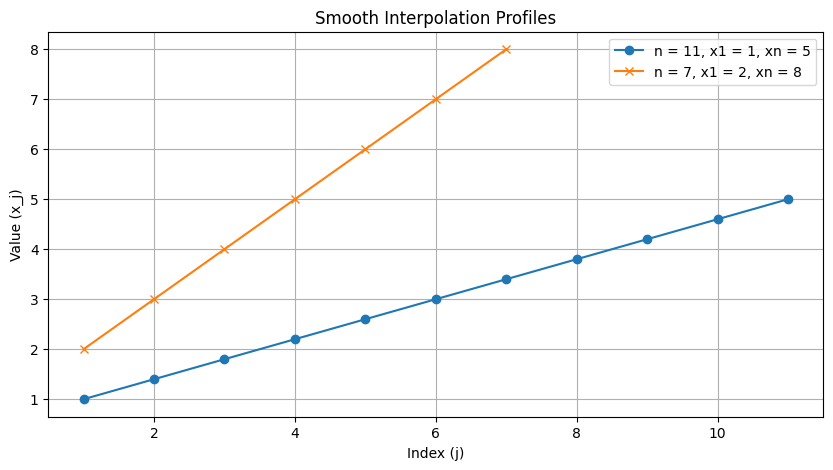

In [30]:
# Test Case 1: n = 11, x1 = 1, xn = 5
n1, x1_1, xn_1 = 11, 1, 5
result1 = solve_smooth_interpolation(n1, x1_1, xn_1)

# Test Case 2: n = 7, x1 = 2, xn = 8
n2, x1_2, xn_2 = 7, 2, 8
result2 = solve_smooth_interpolation(n2, x1_2, xn_2)

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(range(1, n1 + 1), result1, marker='o', label=f"n = {n1}, x1 = {x1_1}, xn = {xn_1}")
plt.plot(range(1, n2 + 1), result2, marker='x', label=f"n = {n2}, x1 = {x1_2}, xn = {xn_2}")
plt.title("Smooth Interpolation Profiles")
plt.xlabel("Index (j)")
plt.ylabel("Value (x_j)")
plt.legend()
plt.grid()
plt.show()